# <font color=darkblue> Machine Learning model deployment with Flask framework</font>

## <font color=Blue>Used Cars Price Prediction Application</font>

### Objective:
1. To build a Machine learning regression model to predict the selling price of the used cars based on the different input features like fuel_type, kms_driven, type of transmission etc.
2. Deploy the machine learning model with the help of the flask framework.

### Dataset Information:
#### Dataset Source: https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv
This dataset contains information about used cars listed on www.cardekho.com
- **Car_Name**: Name of the car
- **Year**: Year of Purchase
- **Selling Price (target)**: Selling price of the car in lakhs
- **Present Price**: Present price of the car in lakhs
- **Kms_Driven**: kilometers driven
- **Fuel_Type**: Petrol/diesel/CNG
- **Seller_Type**: Dealer or Indiviual
- **Transmission**: Manual or Automatic
- **Owner**: first, second or third owner


### 1. Import required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score
import warnings
warnings.filterwarnings('ignore')

### 2. Load the dataset

In [5]:
data = pd.read_csv('car+data.csv')
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


### 3. Check the shape and basic information of the dataset.

In [7]:
data.shape

(301, 9)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [11]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

### 4. Check for the presence of the duplicate records in the dataset? If present drop them

In [13]:
data.duplicated().sum()

2

In [15]:
data[data.duplicated()]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
93,fortuner,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0


In [28]:
data.drop_duplicates(keep='first',inplace=True)

### 5. Drop the columns which you think redundant for the analysis.

In [87]:
data.drop(['Owner','Car_Name'],inplace=True,axis=1)

KeyError: "['Owner', 'Car_Name'] not found in axis"

### 6. Extract a new feature called 'age_of_the_car' from the feature 'year' and drop the feature year

In [34]:
#Find age of the car
#import datetime library
from datetime import datetime
current_year=datetime.now().year

In [36]:
data['age_of_the_car']=current_year-data['Year']
data.drop('Year',axis=1,inplace=True)
data['age_of_the_car']

0      10
1      11
2       7
3      13
4      10
       ..
296     8
297     9
298    15
299     7
300     8
Name: age_of_the_car, Length: 299, dtype: int64

### 7. Encode the categorical columns

In [38]:
#Saving data before standardization
clean_df = data.copy()

In [40]:
#Encode : labelencode all the categorical data
lb = LabelEncoder()
for i in clean_df.select_dtypes('object').columns:
    clean_df[i]=clean_df[[i]].apply(lb.fit_transform)

In [42]:
#Different method to encode
# col=['Fuel_Type','Seller_Type','Transmission']

# for i in col:
#     data[i] = data[[i]].apply(lb.fit_transform)

In [44]:
clean_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,age_of_the_car
0,3.35,5.59,27000,2,0,1,10
1,4.75,9.54,43000,1,0,1,11
2,7.25,9.85,6900,2,0,1,7
3,2.85,4.15,5200,2,0,1,13
4,4.60,6.87,42450,1,0,1,10


In [46]:
print(clean_df['Fuel_Type'].unique())
print(clean_df['Seller_Type'].unique())
print(clean_df['Transmission'].unique())

[2 1 0]
[0 1]
[1 0]


In [48]:
#Standardize the columns, so that values are in a particular range
st = StandardScaler()
scaled_feature = st.fit_transform(clean_df.values)
scaled_feature_df = pd.DataFrame(scaled_feature,index=clean_df.index,columns=clean_df.columns)
scaled_feature_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,age_of_the_car
0,-0.249127,-0.228097,-0.254603,0.491847,-0.741096,0.387298,-0.132992
1,0.032229,0.233700,0.156181,-1.880124,-0.741096,0.387298,0.212787
2,0.534651,0.269942,-0.770651,0.491847,-0.741096,0.387298,-1.170329
3,-0.349612,-0.396448,-0.814297,0.491847,-0.741096,0.387298,0.904345
4,0.002084,-0.078451,0.142061,-1.880124,-0.741096,0.387298,-0.132992


### 8. Separate the target and independent features.

In [50]:
X=clean_df.drop('Selling_Price',axis=1) # All the attributes
Y=clean_df['Selling_Price'] # Selling Price attribute

### 9. Split the data into train and test.

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,train_size=0.7,random_state=1)
print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)
print(X_test.shape,X_test.shape)
print(Y_test.shape,Y_test.shape)

(209, 6) (90, 6)
(209,) (90,)
(90, 6) (90, 6)
(90,) (90,)


### 10. Build a Random forest Regressor model and check the r2-score for train and test.

In [54]:
#Function that takes model and data as input
def fit_n_prd(model,X_test,X_train,Y_test,Y_train): # A model to take the train & text data
    model.fit(X_train,Y_train) # Fit the model with train data
    prdct = model.predict(X_test) # perform prediction on test data X_train
    accuracy= r2_score(Y_test,prdct) #(Y_train,prdct)
    return accuracy,prdct

In [56]:
rfr = RandomForestRegressor()
result_ ,predict_ = fit_n_prd(rfr,X_test,X_train,Y_test,Y_train)

In [58]:
r2_df = pd.DataFrame()
r2_df['RandomForest Regressor']=pd.Series(result_)
r2_df

,RandomForest Regressor
0,0.912597


In [60]:
print("Y_train:",Y_train.shape)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("Y_test:",Y_test.shape)
print("predict :",predict_.shape)
Y_train: (209,)
X_train: (209, 6)
X_test: (90, 6)
Y_test: (90,)
predict : (90,)

Y_train: (209,)
X_train: (209, 6)
X_test: (90, 6)
Y_test: (90,)
predict : (90,)


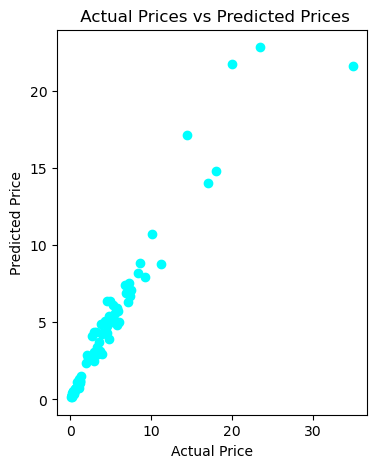

In [62]:
# Plot the Actual and Predicted price
plt.figure(figsize=(4,5))
plt.scatter(Y_test, predict_,c='cyan')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

### 11. Create a pickle file with an extension as .pkl

In [67]:
import pickle
#Save model to pickle file
pickle.dump(rfr,open('model.pkl','wb'))

#Loading model to compare results
model = pickle.load(open('model.pkl','rb'))

### 12. Create new folder/new project in visual studio/pycharm that should contain the "model.pkl" file *make sure you are using a virutal environment and install required packages.*

### a) Create a basic HTML form for the frontend

Create a file **index.html** in the templates folder and copy the following code.

In [79]:
#index html
{% extends "layout.html" %} {% block body %}
<h1>Welcome to Car Prediction</h1>
<form method="post" action="/compute">
  <div>
    <input autocomplete="off" autofocus required placeholder="Present Price" name="Present_Price" type="text" />
  </div>
  <div>
    <input placeholder="Kms Driven" autocomplete="off" type="type" name="Kms_Driven" id="Kms_Driven" required
      autofocus />
  </div>
  <label for="Fuel_Type" style="left: auto;color: darkblue;">Fuel Type</label>
  {% for i in Fuel_Type%}
  <div>
    <input type="radio" name="Fuel_Type" id="Fuel_Type" value="{{i}}" required />{{Fuel_Type[i]}}
  </div>
  {% endfor %}
  <label for="Seller_Type" style="left: auto;color: darkblue;">Seller Type</label>
  {% for i in Seller_Type %}
  <div>

    <input type="radio" name="Seller_Type" id="Seller_Type" value="{{i}}"
      required autofocus />{{Seller_Type[i]}}
  </div>
  {% endfor %}
  <label for="Transmission" style="left: auto;color: darkblue;">Transmission</label>
  {% for i in Tansmission %}
  <div>
    <input   type="radio" name="Transmission"
      value="{{i}}" id="Transmission" required />{{Tansmission[i]}}
  </div>
  {% endfor %}
  <div>
    <input autofocus placeholder="age of car" autocomplete="off" type="type" name="age_of_the_car" id="age_of_the_car"
      required />
  </div>
  <div><input type="submit" value="Predict" style="color: blue;box-shadow: 0cqmax;"/></div>
</form>
<div>
  <strong> <span style="color: #0a0506">{{ prediction_text }}</span></strong>
</div>
{% endblock %}

SyntaxError: invalid syntax (380977865.py, line 2)

### b) Create app.py file and write the predict function

In [84]:
# app.py
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
from flask import *
import pickle

app = Flask(__name__)
model = pickle.load(open('model.pkl','rb'))
Fuel_Type = {'0':'Diesel','1':'Petrol','2':'CNG'}
Tansmission = {'0':'Manual','1':'Automatic'}
Seller_Type = {'0':'Dealer','1':'Individual',}

#Index Page
@app.route('/')
def home():
    
    return render_template("Index.html",title="Car Prediction",Fuel_Type=Fuel_Type,Tansmission=Tansmission,Seller_Type=Seller_Type)

#Predicting the car value using model
@app.route('/compute',methods=['Post'])
def compute():
    int_features = [int(x) for x in request.form.values()] # getting the input values from Form
    final_features = [np.array(int_features)]
    scaled_final_features = ss.fit_transform(final_features)
    prediction = model.predict(scaled_final_features) # predicting the Selling value using model.pkl

    output = round(prediction[0], 2)
    return render_template('index.html',message='Predicted value is {}'.format(output),title="Car Prediction",Fuel_Type=Fuel_Type,Tansmission=Tansmission,Seller_Type=Seller_Type)

@app.route("/cookie")
def cookie():
    rsp = make_response("<h1>cookie created</h1>")
    rsp.set_cookie('working with','flask framework')
    return rsp

@app.route("/get-cookie")
def get_cookie():
    working_with = request.cookies.get('working with')
    return jsonify({'working_with':'working with'})

if __name__=="__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

### 13. Run the app.py python file which will render to index html page then enter the input values and get the prediction.

### Happy Learning :)